# City Day.csv

In [42]:
# Data Manipulation
import pandas as pd
import numpy as np

# DataViz
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
dataset = pd.read_csv('D:/Soumya/Soumya - IITKGP/Assignment2/station_hour.csv')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [24]:
df = dataset.copy()
df.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [25]:
df.rename(
    columns={"PM2.5":"PM25"}
          ,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   StationId   object 
 1   Datetime    object 
 2   PM25        float64
 3   PM10        float64
 4   NO          float64
 5   NO2         float64
 6   NOx         float64
 7   NH3         float64
 8   CO          float64
 9   SO2         float64
 10  O3          float64
 11  Benzene     float64
 12  Toluene     float64
 13  Xylene      float64
 14  AQI         float64
 15  AQI_Bucket  object 
dtypes: float64(13), object(3)
memory usage: 316.1+ MB


In [27]:
df.isnull().sum()

StationId           0
Datetime            0
PM25           647689
PM10          1119252
NO             553711
NO2            528973
NOx            490808
NH3           1236618
CO             499302
SO2            742737
O3             725973
Benzene        861579
Toluene       1042366
Xylene        2075104
AQI            570190
AQI_Bucket     570190
dtype: int64

# Data Exploration

In [ ]:
# Let's see the possible best variables for modeling the AQI
sns.pairplot(df);

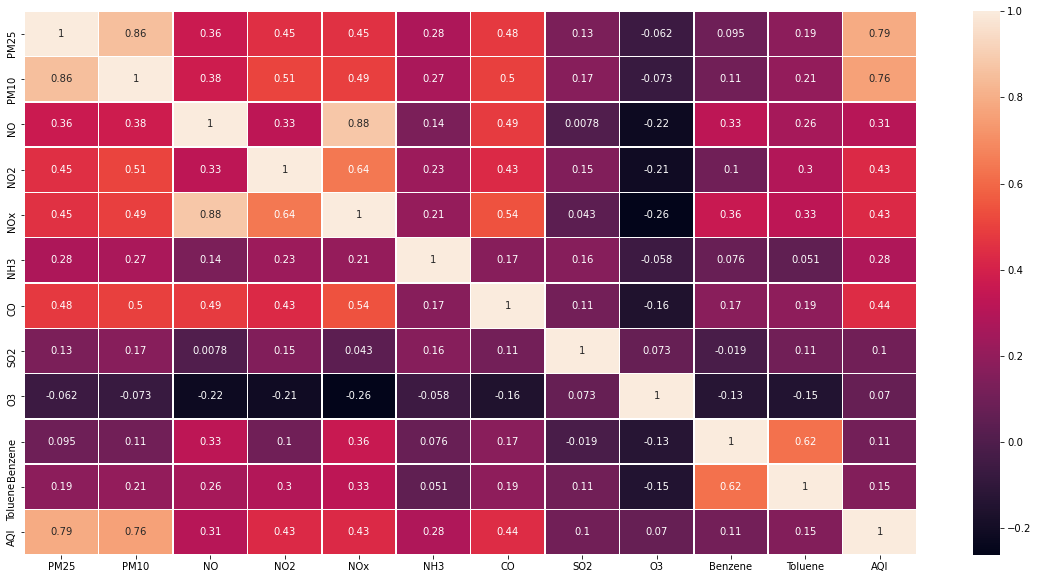

In [38]:
correlation_matrix = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(correlation_matrix,annot=True,linewidths=.5)
plt.show()

In [ ]:
correlation_matrix.style.background_gradient()

# Data Cleaning

In [28]:
df.replace(to_replace=0.0,value=np.nan,inplace=True)

## Drop column Xylene as it has many null values

In [31]:
del df['Xylene']

## Drop null values

In [32]:
selected_columns=['PM25','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','AQI','AQI_Bucket']
df.dropna(axis = 0, how='any',inplace = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139408 entries, 16 to 2543908
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   139408 non-null  object 
 1   Datetime    139408 non-null  object 
 2   PM25        139408 non-null  float64
 3   PM10        139408 non-null  float64
 4   NO          139408 non-null  float64
 5   NO2         139408 non-null  float64
 6   NOx         139408 non-null  float64
 7   NH3         139408 non-null  float64
 8   CO          139408 non-null  float64
 9   SO2         139408 non-null  float64
 10  O3          139408 non-null  float64
 11  Benzene     139408 non-null  float64
 12  Toluene     139408 non-null  float64
 13  AQI         139408 non-null  float64
 14  AQI_Bucket  139408 non-null  object 
dtypes: float64(12), object(3)
memory usage: 17.0+ MB


In [34]:
df.isnull().sum()

StationId     0
Datetime      0
PM25          0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

In [35]:
df = df.replace(np.nan, 0)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139408 entries, 16 to 2543908
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   139408 non-null  object 
 1   Datetime    139408 non-null  object 
 2   PM25        139408 non-null  float64
 3   PM10        139408 non-null  float64
 4   NO          139408 non-null  float64
 5   NO2         139408 non-null  float64
 6   NOx         139408 non-null  float64
 7   NH3         139408 non-null  float64
 8   CO          139408 non-null  float64
 9   SO2         139408 non-null  float64
 10  O3          139408 non-null  float64
 11  Benzene     139408 non-null  float64
 12  Toluene     139408 non-null  float64
 13  AQI         139408 non-null  float64
 14  AQI_Bucket  139408 non-null  object 
dtypes: float64(12), object(3)
memory usage: 17.0+ MB


## Creating year and  month columns

In [37]:
df['Datetime'] = pd.to_datetime(df['Datetime'],format='%Y-%m-%d')
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df

,StationId,Datetime,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,year,month
16,AP001,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.10,15.30,117.62,0.30,10.40,155.0,Moderate,2017,11
17,AP001,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.10,17.00,136.23,0.28,7.10,159.0,Moderate,2017,11
18,AP001,2017-11-25 11:00:00,82.75,126.50,1.47,14.83,9.07,9.70,0.10,15.40,149.92,0.20,4.55,173.0,Moderate,2017,11
24,AP001,2017-11-25 17:00:00,72.75,120.25,1.50,26.72,15.45,10.78,0.10,16.03,137.20,0.10,5.70,191.0,Moderate,2017,11
25,AP001,2017-11-25 18:00:00,81.50,134.75,1.10,18.78,10.88,14.73,0.10,12.93,146.03,0.20,7.15,191.0,Moderate,2017,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543904,WB010,2020-02-14 10:00:00,102.80,192.38,44.95,69.05,114.03,40.23,1.06,7.53,16.70,65.42,59.69,223.0,Poor,2020,2
2543905,WB010,2020-02-14 11:00:00,85.50,161.35,16.15,65.22,81.32,39.08,0.79,8.60,20.47,57.14,51.31,222.0,Poor,2020,2
2543906,WB010,2020-02-14 12:00:00,73.75,143.65,8.40,52.65,61.08,38.53,0.66,9.82,26.58,53.71,51.38,219.0,Poor,2020,2
2543907,WB010,2020-02-14 13:00:00,71.50,133.38,5.60,45.03,50.62,42.62,0.55,9.57,28.28,56.80,56.27,217.0,Poor,2020,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139408 entries, 16 to 2543908
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   StationId   139408 non-null  object        
 1   Datetime    139408 non-null  datetime64[ns]
 2   PM25        139408 non-null  float64       
 3   PM10        139408 non-null  float64       
 4   NO          139408 non-null  float64       
 5   NO2         139408 non-null  float64       
 6   NOx         139408 non-null  float64       
 7   NH3         139408 non-null  float64       
 8   CO          139408 non-null  float64       
 9   SO2         139408 non-null  float64       
 10  O3          139408 non-null  float64       
 11  Benzene     139408 non-null  float64       
 12  Toluene     139408 non-null  float64       
 13  AQI         139408 non-null  float64       
 14  AQI_Bucket  139408 non-null  object        
 15  year        139408 non-null  int64         
 16  

## Pair plots

In [ ]:
# setup figure
select=['PM25','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene']
fig, ax = plt.subplots(2,11, figsize=(60,10))

for i, var in enumerate(select):
  # Original data plots
  g= sns.scatterplot(data= df, x=var, y='AQI', color='blue', ax=ax[0][i])
  g.set_title(f'Original Scatter AQI vs. {var}')


In [180]:
select=['PM25','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene']
df[select].describe()

,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene
count,139408.000000,139408.000000,139408.000000,139408.000000,139408.000000,139408.000000,139408.000000,139408.000000,139408.000000,139408.000000
mean,58.010667,117.293198,14.520174,36.836613,35.429534,17.821554,0.805131,10.177578,32.595306,6.408159
std,51.801760,80.460264,31.615391,29.231627,41.014981,15.574368,0.649645,11.568945,29.801983,17.239130
min,0.010000,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,26.500000,63.117500,2.200000,14.270000,13.230000,9.370000,0.420000,3.850000,10.930000,1.000000
50%,47.000000,101.500000,5.100000,29.300000,23.950000,13.850000,0.670000,7.050000,23.400000,2.550000
75%,74.500000,151.325000,13.080000,52.050000,41.030000,22.280000,1.000000,12.200000,44.480000,5.220000
max,999.990000,999.990000,488.450000,432.300000,499.200000,465.800000,48.520000,199.900000,199.300000,282.350000


## Understanding the distribution

In [ ]:
# The cities after cleaning
selected_cities=df.City.unique().tolist()
print('After cleaning the data, it has the following cities: ')
for city in selected_cities:
    print(city)

In [ ]:
df

In [ ]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
select=['PM25', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','Toluene' ]
pollutants=df[select].mean()
pollutantsdf=pollutants.to_frame().reset_index()
pollutantsdf.columns=['Pollutant','Level']

<!-- # Not required # Plotting the pollutants concentration percentage -->

## Pollutant concentration pie chart

In [ ]:
plt.figure(figsize=(11,8))

labels=pollutantsdf.Pollutant
explode=[0.1,0,0,0,0,0,0,0,0,0]

plt.title('Dominant Pollutants in India')
wedges,texts,autotexts=plt.pie(pollutantsdf.Level,explode=explode,autopct='%1.1f%%',shadow=True,startangle=0)
plt.axis('equal')
plt.legend(wedges, labels,
          title="Pollutants",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=14,weight='bold')
plt.show();

## Most Polluted StationId

In [ ]:
mean_df=df.groupby('StationId').mean()
mean_df

In [ ]:
plt.figure(figsize=(10,8))
plt.rc('figure',titlesize=20)
plt.rc('axes',titlesize=20)
sns.barplot(mean_df.index,mean_df.AQI)
plt.title('Most Polluted StationId')
plt.ylabel('AQI')
plt.xlabel('StationId')
plt.xticks(rotation=90);

In [ ]:
## Plotting the StationId wise(for few pollutants) pollutant concentration against each year

In [ ]:
g = sns.FacetGrid(data= df, col="StationId",sharex = True, sharey = False, height=5, aspect=1,col_wrap = 5)
g.map(plt.bar, 'year',"PM10")

In [ ]:
g = sns.FacetGrid(data= df, col="StationId",sharex = True, sharey = False, height=5, aspect=1,col_wrap = 5)
g.map(plt.bar, 'year',"SO2",color = 'g')

In [ ]:
g = sns.FacetGrid(data= df, col="StationId",sharex = True, sharey = False, height=5, aspect=1,col_wrap = 5)
g.map(plt.bar, 'year',"CO")

In [ ]:
g = sns.FacetGrid(data= df, col="StationId",sharex = True, sharey = False, height=5, aspect=1,col_wrap = 5)
g.map(plt.bar, 'year',"PM25",color = 'g')

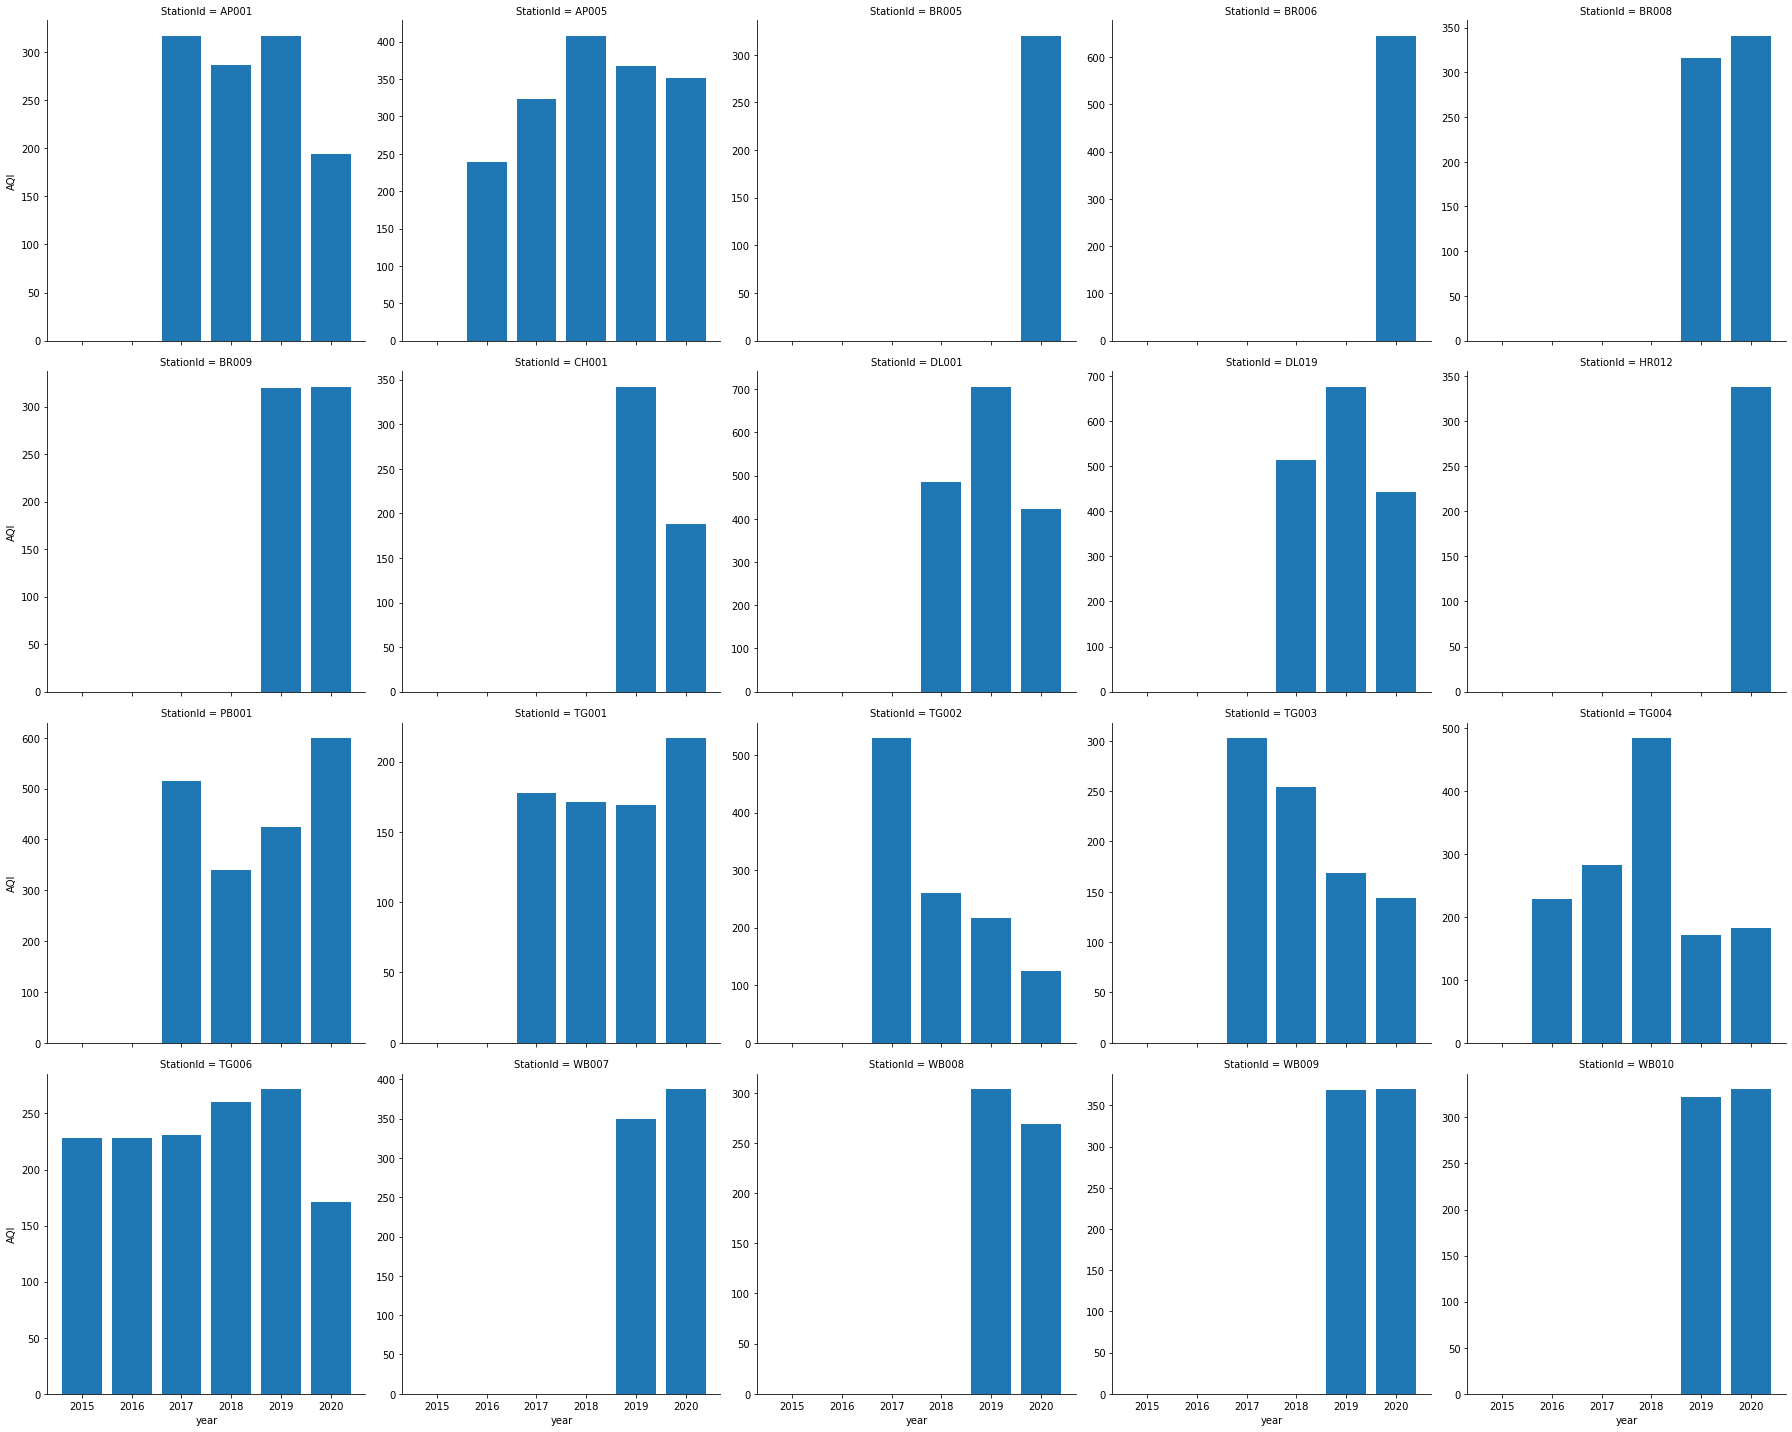

In [18]:
g = sns.FacetGrid(data= df, col="StationId",sharex = True, sharey = False, height=5, aspect=1,col_wrap = 5)
g.map(plt.bar, 'year',"AQI")

## Scatter Pairplots

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, x_vars = ['AQI'], y_vars=['PM25','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene'],hue = 'City')
plt.show()

In [ ]:
#descriptive statistics of AQI
df['AQI'].describe()

## Distribution Plots

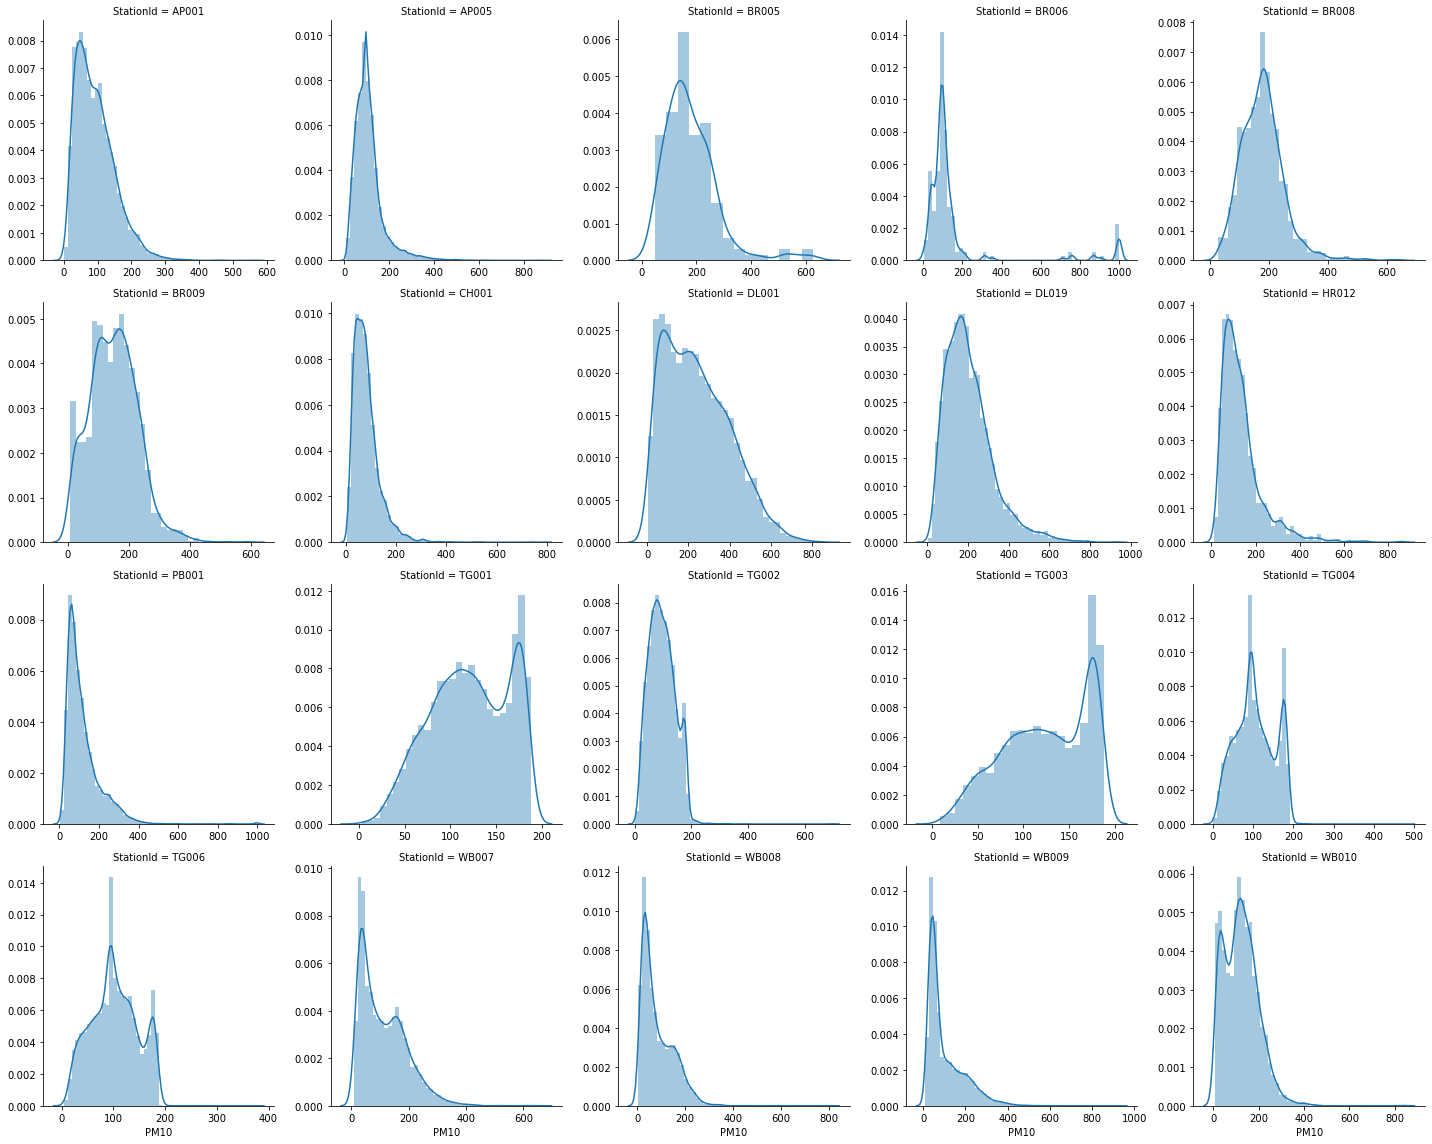

In [19]:
# sns.distplot(data = df['PM10'],col = 'City');
g = sns.FacetGrid(df,col='StationId',sharex = False, sharey = False,height=4, aspect=1,col_wrap = 5)
g = g.map(sns.distplot,'PM10')

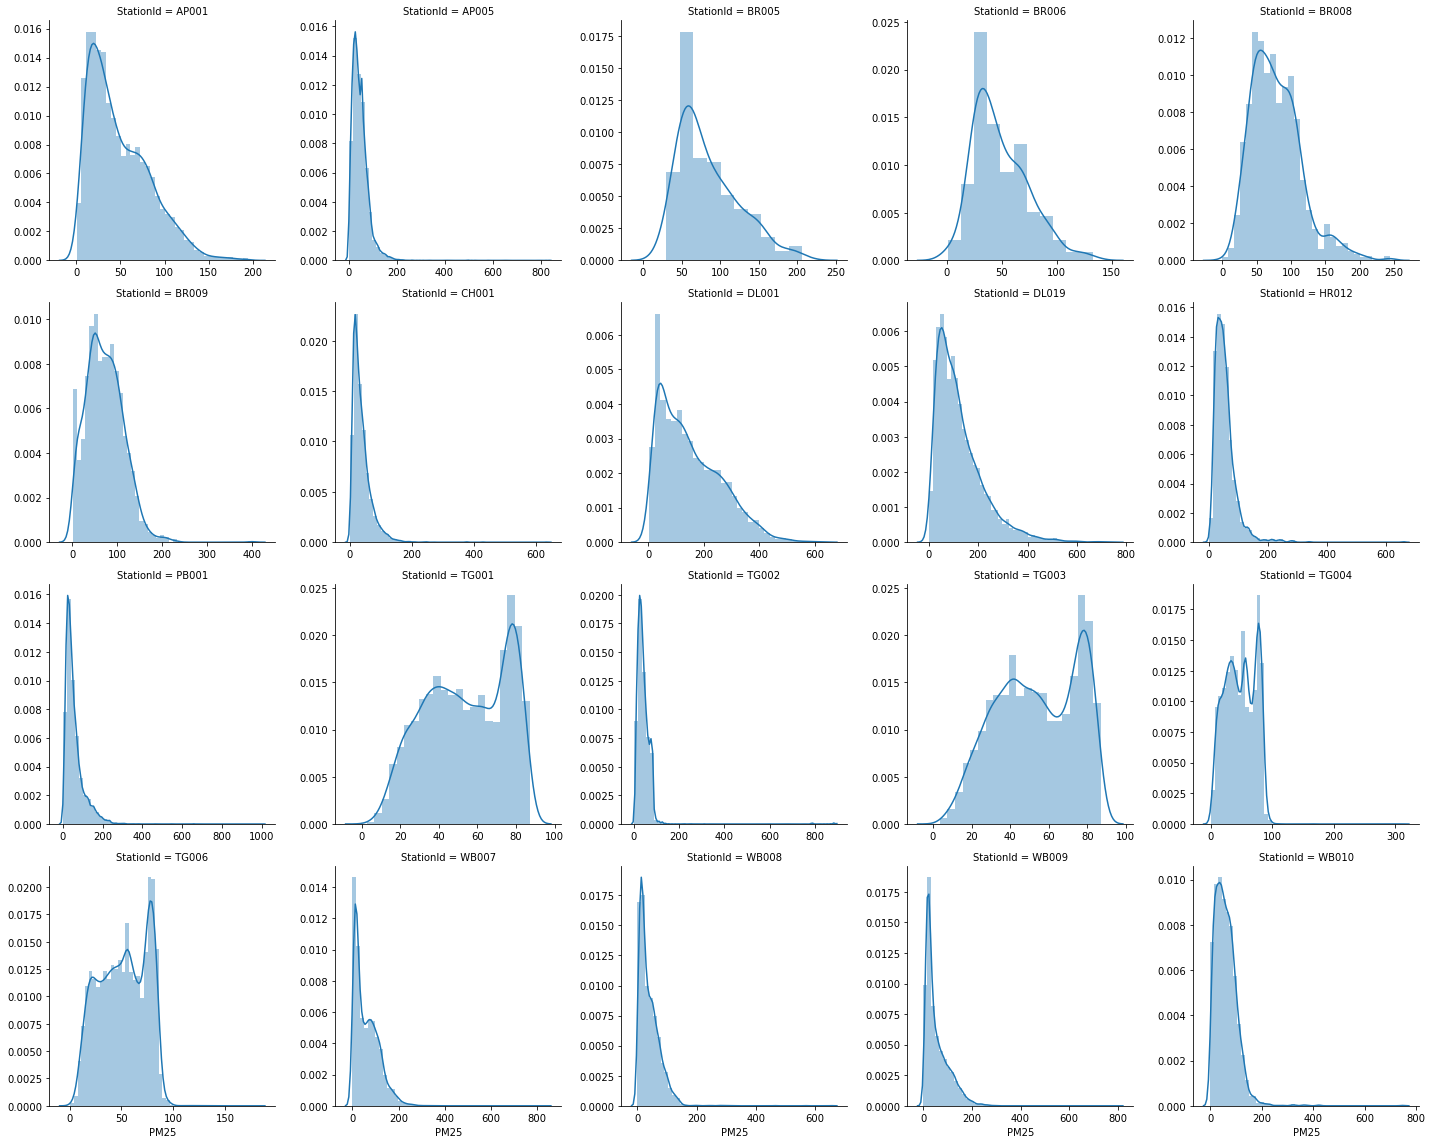

In [20]:
g = sns.FacetGrid(df,col='StationId',sharex = False, sharey = False,height=4, aspect=1,col_wrap = 5)
g = g.map(sns.distplot,'PM25')

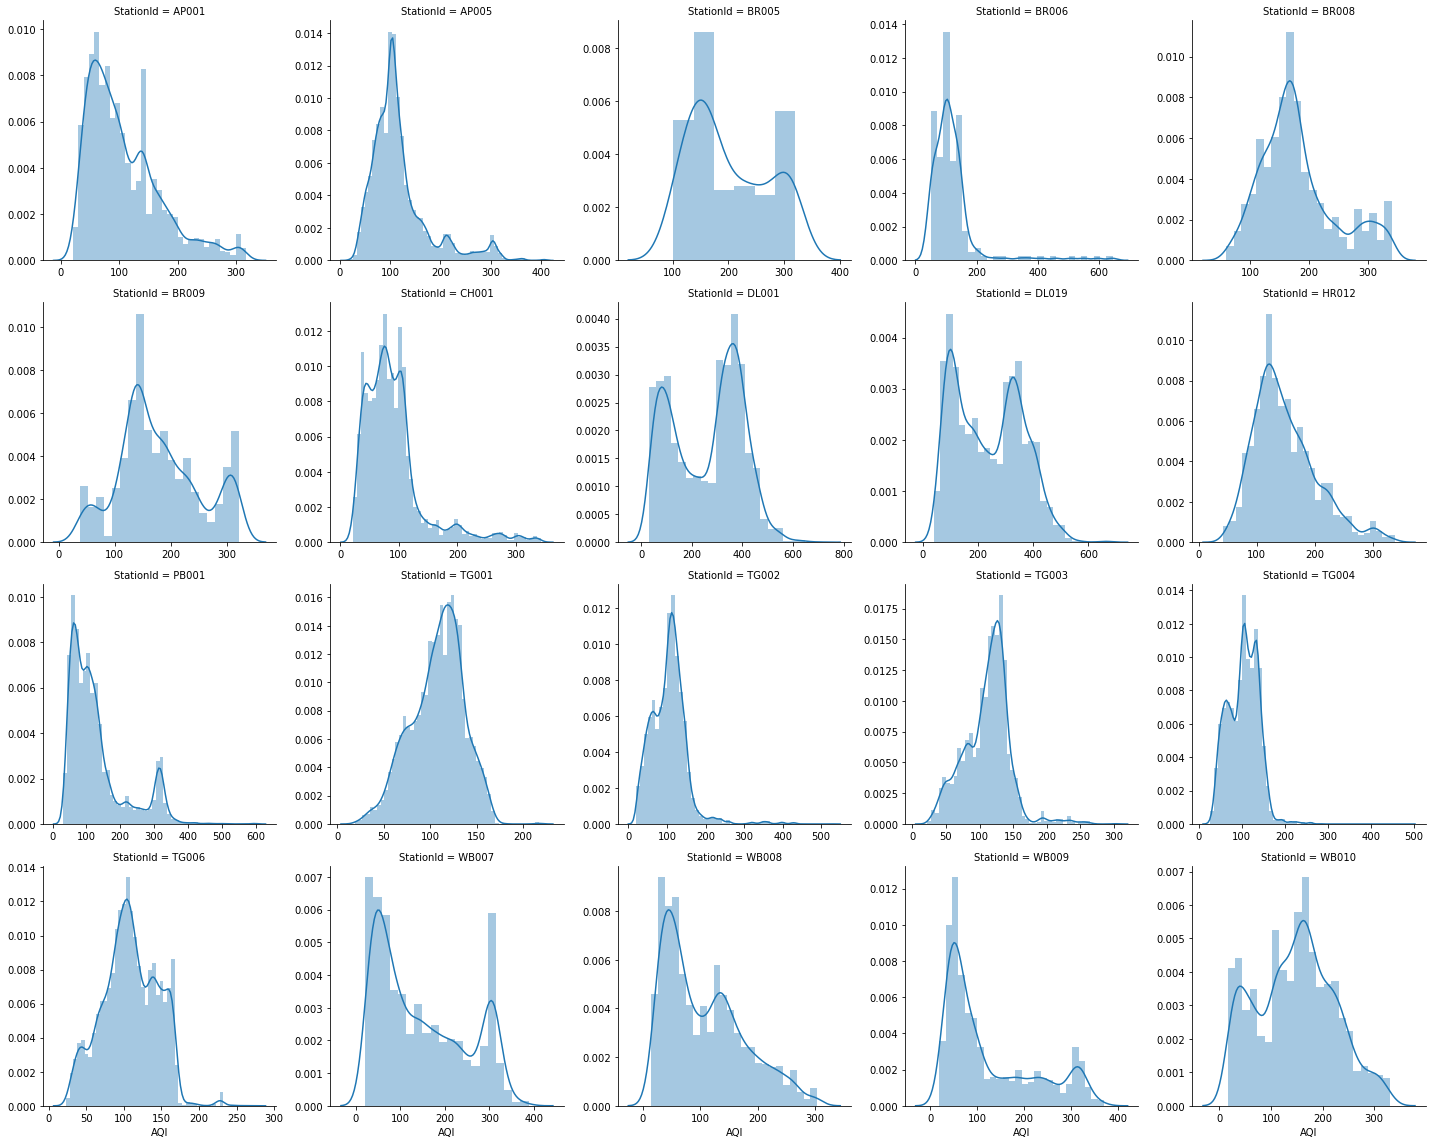

In [21]:
g = sns.FacetGrid(df,col='StationId',sharex = False, sharey = False,height=4, aspect=1,col_wrap = 5)
g = g.map(sns.distplot,'AQI')

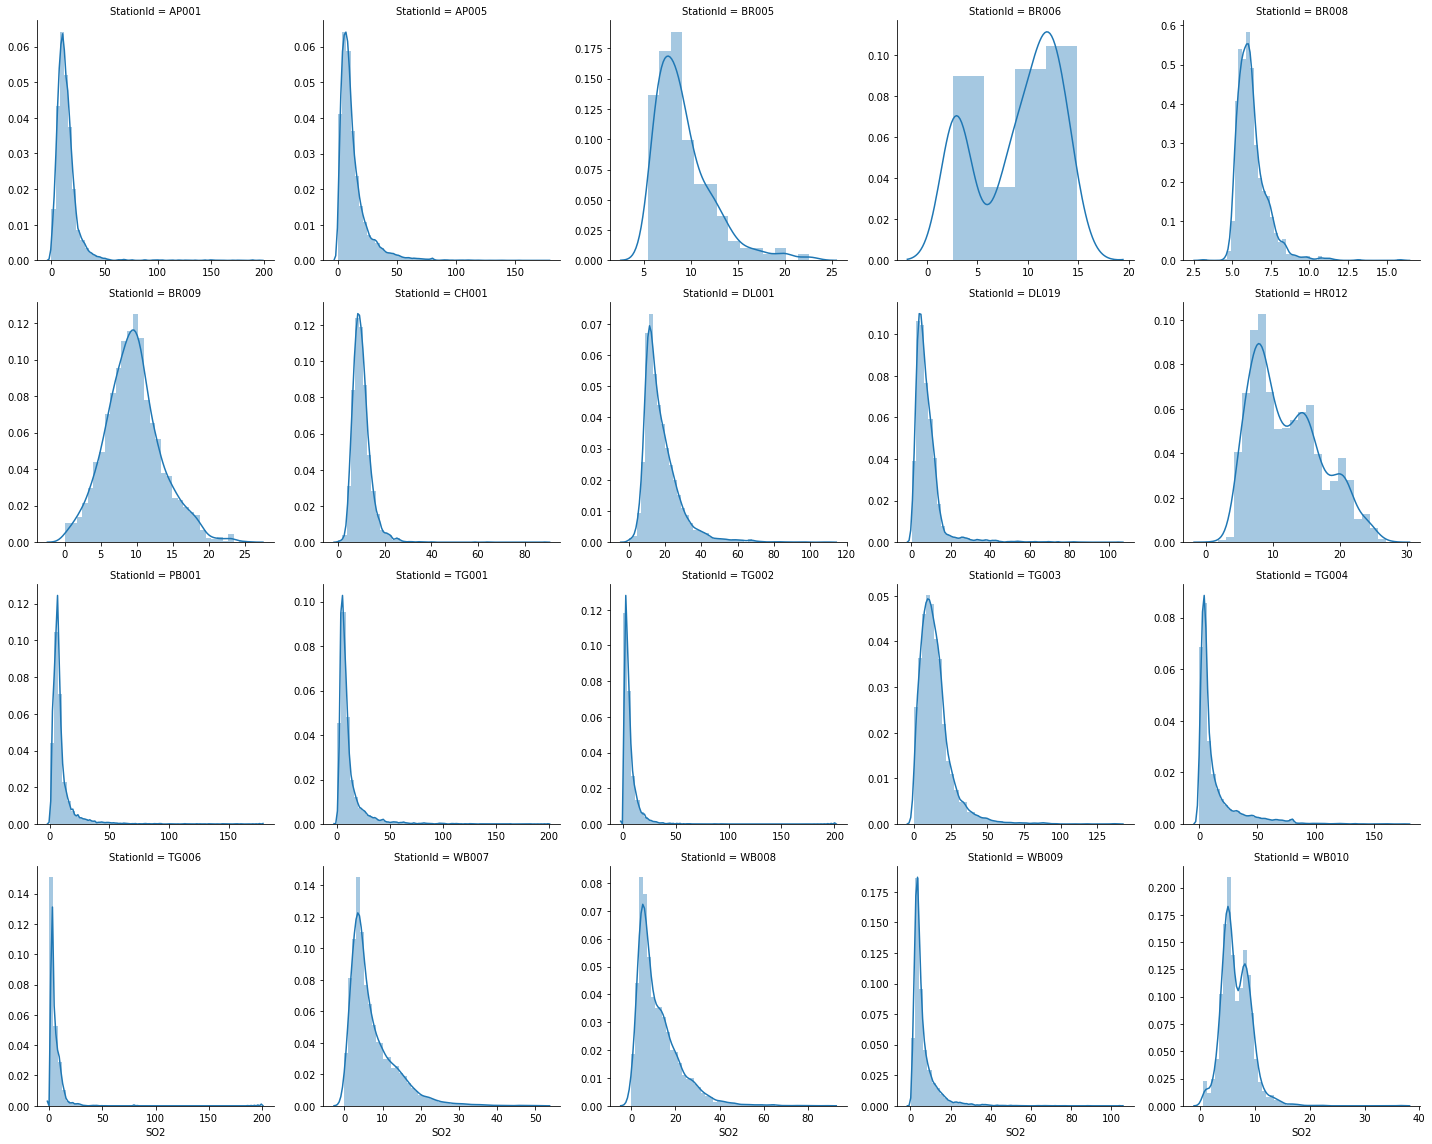

In [22]:
g = sns.FacetGrid(df,col='StationId',sharex = False, sharey = False,height=4, aspect=1,col_wrap = 5)
g = g.map(sns.distplot,'SO2')

## Plotting AQI Bucket 

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'PM25', data=aqi_df,hue ='AQI_Bucket',palette = palette, ci= None)

# Prediction Model
## Dividing the Data into X and Y

In [164]:
# x=df[['PM25','PM10','NO','NOx','NH3','SO2','O3']]
x=df[['PM25','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene']]
y=df['AQI']

In [165]:
x

,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
16,104.00,148.50,1.93,23.00,13.75,9.80,0.10,15.30,117.62
17,94.50,142.00,1.33,16.25,9.75,9.65,0.10,17.00,136.23
18,82.75,126.50,1.47,14.83,9.07,9.70,0.10,15.40,149.92
24,72.75,120.25,1.50,26.72,15.45,10.78,0.10,16.03,137.20
25,81.50,134.75,1.10,18.78,10.88,14.73,0.10,12.93,146.03
...,...,...,...,...,...,...,...,...,...
2543904,102.80,192.38,44.95,69.05,114.03,40.23,1.06,7.53,16.70
2543905,85.50,161.35,16.15,65.22,81.32,39.08,0.79,8.60,20.47
2543906,73.75,143.65,8.40,52.65,61.08,38.53,0.66,9.82,26.58
2543907,71.50,133.38,5.60,45.03,50.62,42.62,0.55,9.57,28.28


In [166]:
y

16         155.0
17         159.0
18         173.0
24         191.0
25         191.0
           ...  
2543904    223.0
2543905    222.0
2543906    219.0
2543907    217.0
2543908    215.0
Name: AQI, Length: 139408, dtype: float64

# Multiple Regression Model

In [167]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=0)

### Let's see the scatteplots now that we have removed the outliers

In [168]:
# # setup figure
# fig, ax = plt.subplots(2,9, figsize=(30,10))

# for i, var in enumerate(selected_columns):
#   # Original data plots
#   g= sns.scatterplot(data= df, x=var, y='AQI', color='blue', ax=ax[0][i])
#   g.set_title(f'Original Scatter AQI vs. {var}')


In [169]:
linreg=LinearRegression()

In [170]:
linreg.fit(xtrain, ytrain)

LinearRegression()

In [171]:
ypred=linreg.predict(xtest)

In [172]:
from sklearn.metrics import r2_score
Accuracy=r2_score(ytest,ypred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 68.89


# Model Evaluation

# Plot the Results

In [ ]:
plt.scatter(ytest,ypred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

# Regression plot of our model.

In [ ]:
sns.regplot(x=ytest,y=ypred,ci=None, marker="+",color ='green');

# Regression model using statsmodel

In [146]:
import statsmodels.api as sm
#add constant to predictor variables
x1 = sm.add_constant(xtrain)

In [147]:
#fit linear regression model
model = sm.OLS(ytrain, x1).fit()

In [148]:
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 1.970e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:02:46   Log-Likelihood:            -5.0870e+05
No. Observations:               97585   AIC:                         1.017e+06
Df Residuals:                   97573   BIC:                         1.018e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.3603      0.366     61.071      0.0

In [100]:
# from sklearn.metrics import accuracy_score
# accuracy_score(ytest, ypred)

In [ ]:
sns.distplot((ytest-ypred),bins=35)

## Predicted Values

In [ ]:
pred_df=pd.DataFrame({'Actual Value':ytest,'Predicted Value':ypred,'Difference':ytest-ypred})
pred_df

# Decision Tree Model

In [149]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion='mse')
tree.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [150]:
tree_pred = tree.predict(xtest)

In [151]:
from sklearn.metrics import r2_score
Accuracy=r2_score(ytest,tree_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 61.34


## Plot the Results

In [ ]:
plt.scatter(ytest,tree_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

# Regression plot of our model.

In [ ]:
sns.regplot(x=ytest,y=tree_pred,ci=None, marker="+",color ='green');

## Actual and Predicted data frame

In [ ]:
pred_df=pd.DataFrame({'Actual Value':ytest,'Predicted Value':tree_pred,'Difference':ytest-tree_pred})
pred_df

In [ ]:
sns.distplot((ytest - tree_pred),bins=45)

# KNN REGRESSOR

In [152]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=1)

In [155]:
knn_pred = knn.predict(xtest)

## Accuracy of the model

In [156]:
from sklearn.metrics import r2_score
Accuracy=r2_score(ytest,knn_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 68.83


# Plot the Results

In [ ]:
plt.scatter(ytest,knn_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

# Regression plot of our model.

In [ ]:
sns.regplot(x=ytest,y=knn_pred,ci=None, marker="+",color ='green');

## Actual and Predicted data frame

In [ ]:
pred_df=pd.DataFrame({'Actual Value':ytest,'Predicted Value':knn_pred,'Difference':ytest-knn_pred})
pred_df

In [ ]:
sns.distplot(ytest - knn_pred)

In [ ]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(ytest, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(ytest, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(ytest, pred))}")

# Lasso Regressor

In [157]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(xtrain,ytrain)

Lasso(alpha=0.1)

In [158]:
lasso_pred = lassoReg.predict(xtest)

## Accuracy of the model

In [159]:
from sklearn.metrics import r2_score
Accuracy=r2_score(ytest,lasso_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 68.94


## Plot the Results

In [ ]:
plt.scatter(ytest,lasso_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

# Regression plot of our model

In [ ]:
sns.regplot(x=ytest,y=lasso_pred,ci=None, marker="+",color ='green');

In [ ]:
## Actual and Predicted data frame

In [ ]:
pred_df=pd.DataFrame({'Actual Value':ytest,'Predicted Value':lasso_pred,'Difference':ytest-lasso_pred})
pred_df

In [ ]:
sns.distplot(ytest - lasso_pred)

In [ ]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(ytest, lasso_pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(ytest, lasso_pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(ytest, lasso_pred))}")

# RANDOM FOREST REGRESSOR

In [135]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [173]:
forest.fit(xtrain, ytrain)

RandomForestRegressor()

In [174]:
forest_pred = forest.predict(xtest)

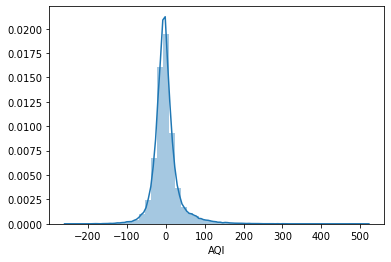

In [138]:
sns.distplot(ytest - forest_pred)

### Accuracy of the model

In [175]:
from sklearn.metrics import r2_score
Accuracy=r2_score(ytest,forest_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 79.91
